Coursework - Task 2

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression

# Creating a multivariate regression dataset using sklearn’s make_regression function
features, y = make_regression(n_samples=1000, n_features=5, noise=15, random_state=1)

features = pd.DataFrame(features, columns=['X1', 'X2', 'X3',  'X4', 'X5'])
features


,X1,X2,X3,X4,X5
0,1.869022,-1.593148,2.301561,-1.106284,0.990264
1,-1.043400,1.320418,0.471534,0.956689,0.518969
2,0.194242,-1.061130,-0.366098,0.938927,-1.323831
3,0.463217,0.475341,-0.688159,1.750722,0.565973
4,-0.108010,0.567931,-1.146575,0.423871,-0.692175
...,...,...,...,...,...
995,0.007627,-0.206823,-0.034551,-1.109386,-1.156086
996,0.211096,1.119552,1.192294,1.231123,1.446394
997,-1.035038,-1.778318,-0.461850,-1.300474,-1.438745
998,0.177654,-0.638601,0.530070,1.550482,-0.876251


In [2]:
# Creating the dataframe to house the variable 'y'
y = pd.DataFrame(y, columns=['y'])
print(y)

              y
0    125.292775
1    -31.539149
2    -12.402882
3    133.571935
4      4.017033
..          ...
995  -69.290661
996   97.617531
997 -195.839458
998   47.921170
999  -81.382308

[1000 rows x 1 columns]


In [7]:
# Combining them to form the dataframe (df)
df = pd.concat([features, y], axis=1)
df

,X1,X2,X3,X4,X5,y
0,1.869022,-1.593148,2.301561,-1.106284,0.990264,125.292775
1,-1.043400,1.320418,0.471534,0.956689,0.518969,-31.539149
2,0.194242,-1.061130,-0.366098,0.938927,-1.323831,-12.402882
3,0.463217,0.475341,-0.688159,1.750722,0.565973,133.571935
4,-0.108010,0.567931,-1.146575,0.423871,-0.692175,4.017033
...,...,...,...,...,...,...
995,0.007627,-0.206823,-0.034551,-1.109386,-1.156086,-69.290661
996,0.211096,1.119552,1.192294,1.231123,1.446394,97.617531
997,-1.035038,-1.778318,-0.461850,-1.300474,-1.438745,-195.839458
998,0.177654,-0.638601,0.530070,1.550482,-0.876251,47.921170


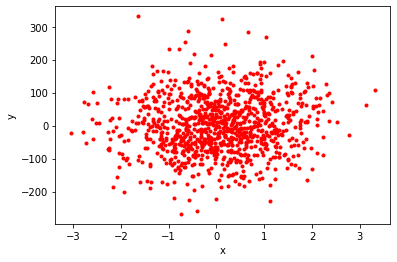

In [4]:
# Ploting out the graph of one of the columns (X2) to see the outliers
plt.scatter(features.iloc[:, 2], y, color='red', marker=".", label='y')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [5]:
# Using statsmodels to print a report on thestatistics of the dataframe
import statsmodels.api as sm

SM_model = sm.OLS(y, features).fit()
print(SM_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              6355.
Date:                Sun, 02 Jan 2022   Prob (F-statistic):                        0.00
Time:                        03:50:58   Log-Likelihood:                         -4123.5
No. Observations:                1000   AIC:                                      8257.
Df Residuals:                     995   BIC:                                      8282.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [8]:
# Defining X and y variables
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [10]:
# Splitting the dataset up for training and validation
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.10, random_state=1)
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((900, 5), (900,), (100, 5), (100,))

In [11]:
# Using skleanr - LocalOutlierFactor to find and remove the 1% of the outliers in the dataset 
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(contamination=0.01, n_neighbors=20,  novelty=False)
yhat = lof.fit_predict(x_train)

# Selecting all rows that are not outliers
mask = yhat != -1

# Selecting all rows that are outliers
non_mask = yhat == -1
x_outlier, y_outlier = x_train[non_mask, :], y_train[non_mask]

# Printing Results
print(x_outlier, "\n\n", y_outlier)

[[ 2.59625359  1.66577009  1.04556738  2.0043766   0.22344646]
 [ 3.7402489  -0.45877498 -1.63647401  0.72282268  1.34027191]
 [ 1.18901076 -1.81472709 -2.61729009  0.18174103 -2.31842848]
 [-0.61803685 -2.50644065 -1.94258918 -2.11416392 -2.03720123]
 [ 0.85405084  2.44537804 -1.35810146  2.08721374  0.66155578]
 [ 0.29811228  2.89359255 -2.25107655  2.74215521 -0.13263657]
 [ 3.9586027  -1.39881282  0.10734329  0.08176782  0.64864364]
 [-0.3558323   0.44031311  3.13504734 -1.43919436  2.89438619]
 [-0.1218591  -2.91449892 -2.27215913  0.39093519  0.19084898]] 

 [ 268.66291967  331.68511383   19.58721639 -202.13003797  179.89088805
  117.78732809  324.72576188   61.62286947  -18.49514481]


In [12]:
# Reseting x_train and y_train to the new shape once the outliers were removed from the dataframe
x_train, y_train = x_train[mask, :], y_train[mask]

# Summarising the shape of the updated training dataset
print(x_train.shape, y_train.shape)

(891, 5) (891,)


In [13]:
# Printing out the Outliers
outliers = [each[1] for each in list(zip(yhat, x_train.tolist())) if each[0] == -1]

print(len(outliers))
for i in outliers:
    print(i)

9
[0.3778297912979604, 0.09986144802354702, -2.182425399509166, -0.2056777237581383, 1.230299344816437]
[0.09782983053975428, 0.48125579224153536, 0.2921736528161169, 1.7981625491134277, 1.1053352851540197]
[-0.7313332135876747, 1.0534759531187834, 0.33288725589561, -1.2506780630612555, -0.007587084742426058]
[1.0090902626721503, -0.31663164258546, -0.5516802438110113, -0.4449950027159164, 0.11197268749652817]
[-0.0521998698542908, 2.252553060760863, 0.29702659916951785, -1.010409948700302, 0.4608289844097452]
[0.6848194568419582, 0.23311263636668741, 0.1650850837802196, -1.8027220504245314, 1.1774543938903057]
[0.515413801783241, 0.6745707069560037, -0.7673098263317347, 1.460892380463078, -1.1148710523659369]
[-0.6832707184137332, 0.24967101487352886, -0.8912576389118602, -0.6631558312958422, -0.23558565194673464]
[-2.0175496143837366, -0.41681131644593494, -0.04413434220979173, 0.5221263819267481, 0.919058572264923]


Nested Loops

In [11]:
#Compairing nested loops using F test
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

cars_df = pd.read_csv("https://raw.githubusercontent.com/focods/WonderfulML/master/data/mtcars.csv")
m01 = ols('mpg ~ am + wt', data=cars_df).fit()
m02 = ols('mpg ~ am + wt + am:wt', data=cars_df).fit()
Results = anova_lm(m01, m02)
print(Results)

   df_resid         ssr  df_diff    ss_diff         F    Pr(>F)
0      29.0  278.319697      0.0        NaN       NaN       NaN
1      28.0  188.007666      1.0  90.312031  13.45018  0.001017
